In [ ]:
#Get all packages needed
import pandas as pd
import numpy as np
import datetime as dt
from matplotlib.ticker import FuncFormatter
import matplotlib.pyplot as plt
import warnings
import math as ma
import seaborn as sns
warnings.filterwarnings("ignore")

In [ ]:
# Mount the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
xls = pd.ExcelFile('/content/drive/MyDrive/Colab Notebooks/KPMG_data/KPMG_VI_New_raw_data_update_final.xlsx')
Transactions_data = pd.read_excel(xls, 'Transactions',skiprows=[0])
NewCustomerList_data = pd.read_excel(xls, 'NewCustomerList',skiprows=[0])
customer_demo_graphic_data = pd.read_excel(xls, 'CustomerDemographic',skiprows=[0])
CustomerAddress_data = pd.read_excel(xls, 'CustomerAddress',skiprows=[0])

In [ ]:
customer_demo_graphic_data.columns

Index(['customer_id', 'first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'default', 'owns_car', 'tenure'],
      dtype='object')

In [ ]:
customer_demo_graphic_data.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,1.0,Laraine,Medendorp,F,93.0,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
1,2.0,Eli,Bockman,Male,81.0,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0
2,3.0,Arlin,Dearle,Male,61.0,1954-01-20,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0
3,4.0,Talbot,NaN,Male,33.0,1961-10-03,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0
4,5.0,Sheila-kathryn,Calton,Female,56.0,1977-05-13,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0


#### Data Cleaning 

In [ ]:
customer_demo_graphic_data = customer_demo_graphic_data.drop(['first_name', 'last_name', 'default', 'job_title'], axis=1)
customer_demo_graphic_data['gender'].replace(['F', 'Femal'], 'Female', inplace=True)
customer_demo_graphic_data['gender'].replace('M', 'Male', inplace=True)
customer_demo_graphic_data['gender'].replace('U', 'Unknown', inplace=True)
customer_demo_graphic_data['deceased_indicator'].replace(['N'], 0, inplace=True)
customer_demo_graphic_data['deceased_indicator'].replace(['Y'], 1, inplace=True)
customer_demo_graphic_data['owns_car'].replace('Yes', 1, inplace=True)
customer_demo_graphic_data['owns_car'].replace('No', 0, inplace=True)
customer_demo_graphic_data = customer_demo_graphic_data[customer_demo_graphic_data['DOB'] != customer_demo_graphic_data.DOB.min()]
customer_demo_graphic_data[customer_demo_graphic_data['deceased_indicator'] == 0]
customer_demo_graphic_data = customer_demo_graphic_data.drop(['deceased_indicator'], axis=1)
customer_demo_graphic_data_clean = customer_demo_graphic_data.dropna()
customer_demo_graphic_data_clean.head()

,customer_id,gender,past_3_years_bike_related_purchases,DOB,job_industry_category,wealth_segment,owns_car,tenure
0,1.0,Female,93.0,1953-10-12,Health,Mass Customer,1,11.0
1,2.0,Male,81.0,1980-12-16,Financial Services,Mass Customer,1,16.0
2,3.0,Male,61.0,1954-01-20,Property,Mass Customer,1,15.0
3,4.0,Male,33.0,1961-10-03,IT,Mass Customer,0,7.0
5,6.0,Male,35.0,1966-09-16,Retail,High Net Worth,1,13.0


In [ ]:
#calculating the age class from DOB and add in that dataset
customer_demo_graphic_data_clean['age'] = (dt.datetime.now() - customer_demo_graphic_data_clean['DOB']) / np.timedelta64(1, 'Y')
customer_demo_graphic_data_clean['age_class'] = ((round(customer_demo_graphic_data_clean['age'] / 10)) * 10).astype(int)
customer_demo_graphic_data_clean.head()

,customer_id,gender,past_3_years_bike_related_purchases,DOB,job_industry_category,wealth_segment,owns_car,tenure,age,age_class
0,1.0,Female,93.0,1953-10-12,Health,Mass Customer,1,11.0,69.402190,70
1,2.0,Male,81.0,1980-12-16,Financial Services,Mass Customer,1,16.0,42.222988,40
2,3.0,Male,61.0,1954-01-20,Property,Mass Customer,1,15.0,69.128400,70
3,4.0,Male,33.0,1961-10-03,IT,Mass Customer,0,7.0,61.426667,60
5,6.0,Male,35.0,1966-09-16,Retail,High Net Worth,1,13.0,56.473794,60


In [ ]:
customer_demo_graphic_data.isnull().sum()

customer_id                              0
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     87
job_industry_category                  656
wealth_segment                           0
owns_car                                 0
tenure                                  87
dtype: int64

In [ ]:
customer_demo_graphic_data.nunique()

customer_id                            3999
gender                                    3
past_3_years_bike_related_purchases     100
DOB                                    3447
job_industry_category                     9
wealth_segment                            3
owns_car                                  2
tenure                                   22
dtype: int64

In [ ]:
customer_demo_graphic_data.describe()

,customer_id,past_3_years_bike_related_purchases,owns_car,tenure
count,3999.000000,3999.000000,3999.000000,3912.000000
mean,2000.991748,48.887472,0.506127,10.654652
std,1154.570372,28.718151,0.500025,5.658898
min,1.000000,0.000000,0.000000,1.000000
25%,1001.500000,24.000000,0.000000,6.000000
50%,2001.000000,48.000000,1.000000,11.000000
75%,3000.500000,73.000000,1.000000,15.000000
max,4000.000000,99.000000,1.000000,22.000000


In [ ]:
CustomerAddress_data['state'].replace('New South Wales', 'NSW', inplace=True)
CustomerAddress_data['state'].replace('Victoria', 'VIC', inplace=True)
addr_df_clean = CustomerAddress_data.dropna()
addr_df_clean.head()

,customer_id,address,postcode,state,country,property_valuation
0,1.0,060 Morning Avenue,2016.0,NSW,Australia,10.0
1,2.0,6 Meadow Vale Court,2153.0,NSW,Australia,10.0
2,4.0,0 Holy Cross Court,4211.0,QLD,Australia,9.0
3,5.0,17979 Del Mar Point,2448.0,NSW,Australia,4.0
4,6.0,9 Oakridge Court,3216.0,VIC,Australia,9.0


#### Merge two data frame into one ( customer_demo_graphic_data_clean && addr_df_clean)

In [ ]:
merge_dataset_df = pd.merge(customer_demo_graphic_data_clean, addr_df_clean, left_index=True, right_index=True)
merge_dataset_df= merge_dataset_df.dropna()
merge_dataset_df.head(2)

,customer_id_x,gender,past_3_years_bike_related_purchases,DOB,job_industry_category,wealth_segment,owns_car,tenure,age,age_class,customer_id_y,address,postcode,state,country,property_valuation
0,1.0,Female,93.0,1953-10-12,Health,Mass Customer,1,11.0,69.402190,70,1.0,060 Morning Avenue,2016.0,NSW,Australia,10.0
1,2.0,Male,81.0,1980-12-16,Financial Services,Mass Customer,1,16.0,42.222988,40,2.0,6 Meadow Vale Court,2153.0,NSW,Australia,10.0


In [ ]:
## sort values on Transcations data
transaction_df = Transactions_data.sort_values('customer_id')
transaction_df.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
14485,14486.0,23.0,1.0,2017-03-27,0.0,Approved,Norco Bicycles,Mountain,low,small,688.63,612.88,33455.0
18969,18970.0,11.0,1.0,2017-03-29,1.0,Approved,Giant Bicycles,Standard,high,medium,1274.93,764.96,35378.0
16422,16423.0,9.0,1.0,2017-12-09,1.0,Approved,OHM Cycles,Road,medium,medium,742.54,667.40,37838.0
5156,5157.0,47.0,1.0,2017-05-11,1.0,Approved,Trek Bicycles,Road,low,small,1720.70,1531.42,37823.0
13423,13424.0,2.0,1.0,2017-02-21,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,38573.0


In [ ]:
## how many null values are present in that dataset so we need to check that
transaction_df.isna().sum()

transaction_id               0
product_id                   0
customer_id                  0
transaction_date             0
online_order               360
order_status                 0
brand                      197
product_line               197
product_class              197
product_size               197
list_price                   0
standard_cost              197
product_first_sold_date    197
dtype: int64

In [ ]:
##Check how many duplicated columns are there
transaction_df.duplicated().sum()

0

In [ ]:
transaction_df.shape

(20000, 13)

In [ ]:
transaction_df['product_first_sold_date'] = pd.TimedeltaIndex(transaction_df['product_first_sold_date'], unit='d') + dt.datetime(1900,1,1)
transaction_df.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
14485,14486.0,23.0,1.0,2017-03-27,0.0,Approved,Norco Bicycles,Mountain,low,small,688.63,612.88,1991-08-07
18969,18970.0,11.0,1.0,2017-03-29,1.0,Approved,Giant Bicycles,Standard,high,medium,1274.93,764.96,1996-11-11
16422,16423.0,9.0,1.0,2017-12-09,1.0,Approved,OHM Cycles,Road,medium,medium,742.54,667.40,2003-08-07
5156,5157.0,47.0,1.0,2017-05-11,1.0,Approved,Trek Bicycles,Road,low,small,1720.70,1531.42,2003-07-23
13423,13424.0,2.0,1.0,2017-02-21,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,2005-08-11


In [ ]:
transaction_df_clean = transaction_df.dropna()
transaction_df_clean.shape

(19445, 13)

In [ ]:
transaction_df_clean['transaction_date'].describe(datetime_is_numeric=True)


count                            19445
mean     2017-07-01 16:21:18.189766144
min                2017-01-01 00:00:00
25%                2017-04-01 00:00:00
50%                2017-07-03 00:00:00
75%                2017-10-02 00:00:00
max                2017-12-30 00:00:00
Name: transaction_date, dtype: object

In [ ]:
most_recent_purchase = transaction_df_clean['transaction_date'].max()
transaction_df_clean['last_purchase_days_ago'] = most_recent_purchase - transaction_df_clean['transaction_date']
transaction_df_clean['last_purchase_days_ago'] /= np.timedelta64(1, 'D')
transaction_df_clean['profit'] = transaction_df_clean['list_price'] - transaction_df_clean['standard_cost']
transaction_df_clean.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,last_purchase_days_ago,profit
14485,14486.0,23.0,1.0,2017-03-27,0.0,Approved,Norco Bicycles,Mountain,low,small,688.63,612.88,1991-08-07,278.0,75.75
18969,18970.0,11.0,1.0,2017-03-29,1.0,Approved,Giant Bicycles,Standard,high,medium,1274.93,764.96,1996-11-11,276.0,509.97
16422,16423.0,9.0,1.0,2017-12-09,1.0,Approved,OHM Cycles,Road,medium,medium,742.54,667.40,2003-08-07,21.0,75.14
5156,5157.0,47.0,1.0,2017-05-11,1.0,Approved,Trek Bicycles,Road,low,small,1720.70,1531.42,2003-07-23,233.0,189.28
13423,13424.0,2.0,1.0,2017-02-21,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,2005-08-11,312.0,17.87


In [ ]:
transaction_df_clean[transaction_df_clean['last_purchase_days_ago'] > 365].shape


(0, 15)

**What is RFM (recency, frequency, monetary) analysis?** 

RFM analysis is a marketing technique used to quantitatively rank and group customers based on the recency, frequency and monetary total of their recent transactions to identify the best customers and perform targeted marketing campaigns.

In [ ]:
rfmModel_Table = transaction_df_clean.groupby('customer_id').agg({'last_purchase_days_ago': lambda x: x.min(),'customer_id': lambda x: len(x),'profit': lambda x: x.sum()})
rfmModel_Table.rename(columns={'last_purchase_days_ago': 'recency', 'customer_id': 'frequency', 'profit': 'monetary_value'}, inplace=True)

In [ ]:
rfmModel_Table.head()

,recency,frequency,monetary_value
customer_id,,,
1.0,7.0,11,3018.09
2.0,128.0,3,2226.26
3.0,102.0,7,3290.21
4.0,195.0,2,220.57
5.0,16.0,6,2394.94


In [ ]:
rfmModel_Table.shape

(3492, 3)

In [ ]:
quartiles = rfmModel_Table.quantile(q=[0.25,0.50,0.75])
quartiles

,recency,frequency,monetary_value
0.25,18.0,4.0,1797.43
0.50,45.0,5.0,2798.99
0.75,88.0,7.0,4122.44


In [ ]:
#ROneHotEncoder function defined
def ROneHotEncoder(x, p, d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.5]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else: 
        return 4
def FMOneHotEncoder(x, p, d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.5]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else: 
        return 1

In [ ]:
rfmSeg = rfmModel_Table
rfmSeg['r_score'] = rfmSeg['recency'].apply(ROneHotEncoder, args=('recency', quartiles))
rfmSeg['f_score'] = rfmSeg['frequency'].apply(FMOneHotEncoder, args=('frequency', quartiles))
rfmSeg['m_score'] = rfmSeg['monetary_value'].apply(FMOneHotEncoder, args=('monetary_value', quartiles))
rfmSeg.head()

,recency,frequency,monetary_value,r_score,f_score,m_score
customer_id,,,,,,
1.0,7.0,11,3018.09,1,1,3
2.0,128.0,3,2226.26,4,4,2
3.0,102.0,7,3290.21,4,3,3
4.0,195.0,2,220.57,4,4,4
5.0,16.0,6,2394.94,1,3,2


In [ ]:
rfmSeg['rfm_class'] = 100 * rfmSeg['r_score'] + 10 * rfmSeg['f_score'] + rfmSeg['m_score']
rfmSeg['total_score'] = rfmSeg['r_score'] + rfmSeg['f_score'] + rfmSeg['m_score']
rfmSeg.head()

,recency,frequency,monetary_value,r_score,f_score,m_score,rfm_class,total_score
customer_id,,,,,,,,
1.0,7.0,11,3018.09,1,1,3,113,5
2.0,128.0,3,2226.26,4,4,2,442,10
3.0,102.0,7,3290.21,4,3,3,433,10
4.0,195.0,2,220.57,4,4,4,444,12
5.0,16.0,6,2394.94,1,3,2,132,6


In [ ]:
rfm_quartiles = (rfmSeg['rfm_class'].min(), rfmSeg['rfm_class'].quantile(q=0.25),
                 rfmSeg['rfm_class'].median(), rfmSeg['rfm_class'].quantile(q=0.75), 
                 rfmSeg['rfm_class'].max())
rfm_quartiles

(111, 144.0, 244.0, 344.0, 444)

In [ ]:
def RFMClassOneHotEncoder(x, p, d):
    if x <= d[0]:
        return 'gold'
    elif x <= d[1]:
        return 'silver'
    elif x <= d[2]: 
        return 'bronze'
    else: 
        return 'basic'

rfmSeg['customer_title'] = rfmSeg['rfm_class'].apply(RFMClassOneHotEncoder, args=('rfm_class', rfm_quartiles))
rfmSeg

,recency,frequency,monetary_value,r_score,f_score,m_score,rfm_class,total_score,customer_title
customer_id,,,,,,,,,
1.0,7.0,11,3018.090000,1,1,3,113,5,silver
2.0,128.0,3,2226.260000,4,4,2,442,10,basic
3.0,102.0,7,3290.210000,4,3,3,433,10,basic
4.0,195.0,2,220.570000,4,4,4,444,12,basic
5.0,16.0,6,2394.940000,1,3,2,132,6,silver
...,...,...,...,...,...,...,...,...,...
3497.0,52.0,3,1648.320000,3,4,4,344,11,basic
3498.0,127.0,6,3147.330000,4,3,3,433,10,basic
3499.0,51.0,7,4955.250000,3,3,1,331,7,basic


In [ ]:
addr_demo_txns = pd.merge(rfmSeg, merge_dataset_df, left_index=True, right_index=True)
addr_demo_txns.columns

Index(['recency', 'frequency', 'monetary_value', 'r_score', 'f_score',
       'm_score', 'rfm_class', 'total_score', 'customer_title',
       'customer_id_x', 'gender', 'past_3_years_bike_related_purchases', 'DOB',
       'job_industry_category', 'wealth_segment', 'owns_car', 'tenure', 'age',
       'age_class', 'customer_id_y', 'address', 'postcode', 'state', 'country',
       'property_valuation'],
      dtype='object')

In [ ]:
addr_demo_txns.shape

(2853, 25)

<AxesSubplot:xlabel='r_score'>

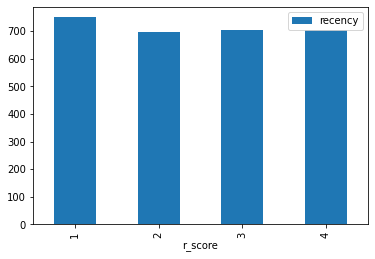

In [ ]:
addr_demo_txns.groupby('r_score').agg('recency').count().to_frame().plot(kind='bar')

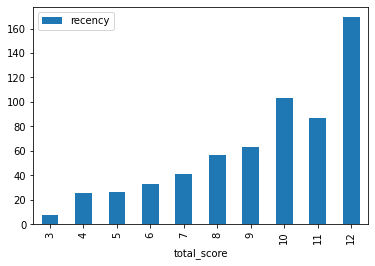

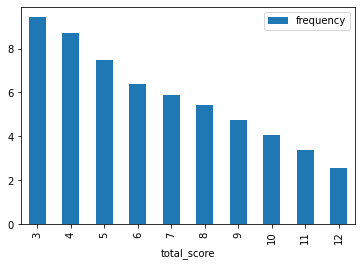

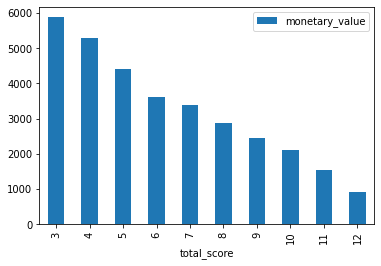

In [ ]:
addr_demo_txns.groupby('total_score').agg('recency').mean().to_frame().plot(kind='bar')
addr_demo_txns.groupby('total_score').agg('frequency').mean().to_frame().plot(kind='bar')
addr_demo_txns.groupby('total_score').agg('monetary_value').mean().to_frame().plot(kind='bar')
plt.show()

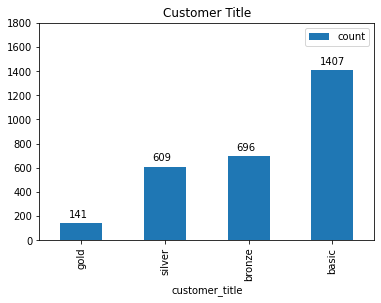

In [ ]:
customer_titles_df = addr_demo_txns.groupby('customer_title').agg({
    'rfm_class': lambda x: len(x)
})
customer_titles_df.rename(columns={'rfm_class': 'count'}, inplace=True)
customer_titles_df.sort_values('count').plot(kind='bar')
for i, v in enumerate(customer_titles_df.sort_values('count')['count']):
    plt.text(i - .15, v + 50, int(v), color='black')
axes = plt.gca()
axes.set_ylim([0, 1800])
plt.title('Customer Title')
plt.show()

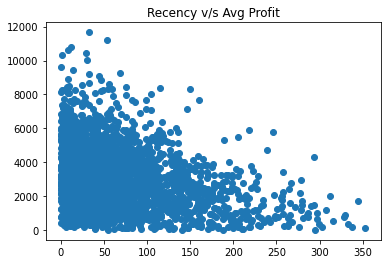

In [ ]:
plt.scatter(addr_demo_txns['recency'], addr_demo_txns['monetary_value'])
plt.title('Recency v/s Avg Profit')
plt.show()

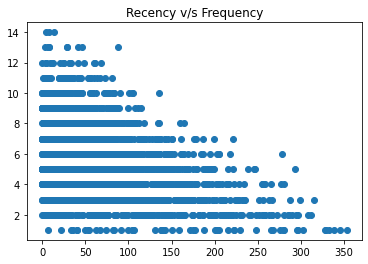

In [ ]:
plt.scatter(addr_demo_txns['recency'], addr_demo_txns['frequency'])
plt.title('Recency v/s Frequency')
plt.show()

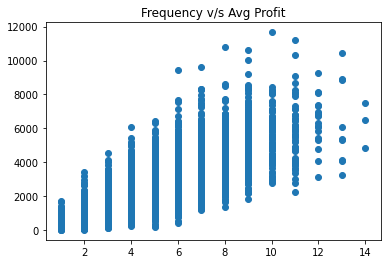

In [ ]:
plt.scatter(addr_demo_txns['frequency'], addr_demo_txns['monetary_value'])
plt.title('Frequency v/s Avg Profit')
plt.show()

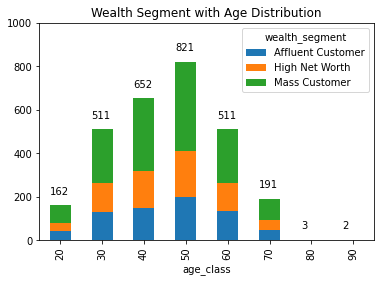

In [ ]:
addr_demo_txns.groupby('age_class')['wealth_segment'] \
    .value_counts() \
    .unstack(level=1) \
    .plot.bar(stacked=True)
for i, v in enumerate(addr_demo_txns.groupby('age_class') \
                      .agg({'wealth_segment': lambda x: len(x)})['wealth_segment']):
    plt.text(i - .25, v + 50, int(v), color='black')
axes = plt.gca()
axes.set_ylim([0, 1000])
plt.title('Wealth Segment with Age Distribution')
plt.show()

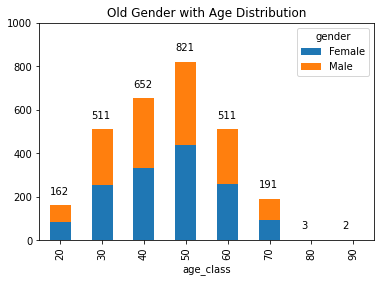

In [ ]:
addr_demo_txns.groupby('age_class')['gender'] \
    .value_counts() \
    .unstack(level=1) \
    .plot.bar(stacked=True)
for i, v in enumerate(addr_demo_txns.groupby('age_class') \
                      .agg({'gender': lambda x: len(x)})['gender']):
    plt.text(i - .25, v + 50, int(v), color='black')
axes = plt.gca()
axes.set_ylim([0, 1000])
plt.title('Old Gender with Age Distribution')
plt.show()

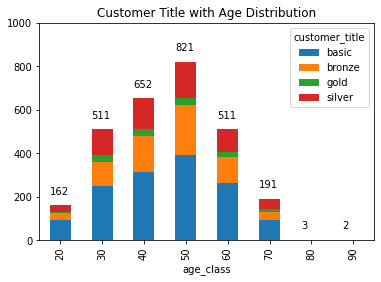

In [ ]:
addr_demo_txns.groupby('age_class')['customer_title'] \
    .value_counts() \
    .unstack(level=1) \
    .plot.bar(stacked=True)
for i, v in enumerate(addr_demo_txns.groupby('age_class') \
                      .agg({'customer_title': lambda x: len(x)})['customer_title']):
    plt.text(i - .25, v + 50, int(v), color='black')
axes = plt.gca()
axes.set_ylim([0, 1000])
plt.title('Customer Title with Age Distribution')
plt.show()

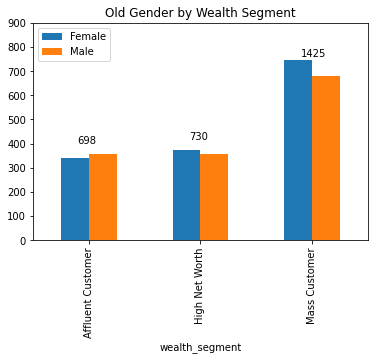

In [ ]:
addr_demo_txns.groupby('wealth_segment')['gender'] \
    .value_counts() \
    .unstack(level=1) \
    .plot.bar(stacked=False)
for i, v in enumerate(addr_demo_txns.groupby('wealth_segment') \
                      .agg({'gender': lambda x: len(x)})['gender']):
    plt.text(i - .1, v // 2 + 50, int(v), color='black')
axes = plt.gca()
axes.set_ylim([0, 900])
plt.title('Old Gender by Wealth Segment')
plt.legend(['Female', 'Male'], loc='upper left')
plt.show()

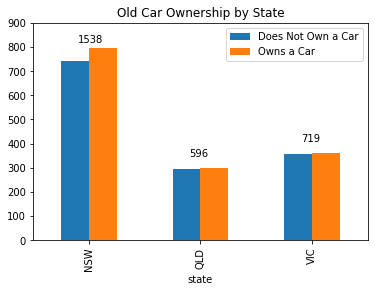

In [ ]:
addr_demo_txns.groupby('state')['owns_car'] \
    .value_counts() \
    .unstack(level=1) \
    .plot.bar(stacked=False)
for i, v in enumerate(addr_demo_txns.groupby('state') \
                      .agg({'owns_car': lambda x: len(x)})['owns_car']):
    plt.text(i - .1, v // 2 + 50, int(v), color='black')
axes = plt.gca()
axes.set_ylim([0, 900])
plt.title('Old Car Ownership by State')
plt.legend(['Does Not Own a Car', 'Owns a Car'], loc='upper right')
plt.show()

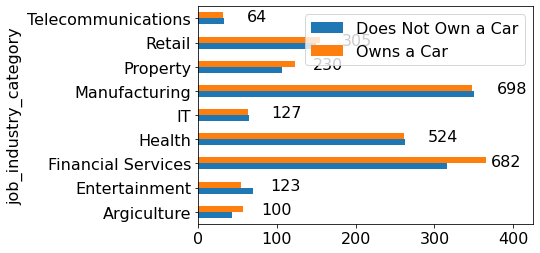

In [143]:
addr_demo_txns.groupby('job_industry_category')['owns_car'] \
    .value_counts() \
    .unstack(level=1) \
    .plot.barh(stacked=False)
for i, v in enumerate(addr_demo_txns.groupby('job_industry_category') \
                      .agg({'owns_car': lambda x: len(x)})['owns_car']):
    plt.text(v // 2 + 30, i - .1, int(v), color='black')
axes = plt.gca()
axes.set_xlim([0,425])
#plt.title('Old Car Ownership by Job Industry')
plt.legend(['Does Not Own a Car', 'Owns a Car'], loc='upper right')
plt.show()

<AxesSubplot:ylabel='owns_car'>

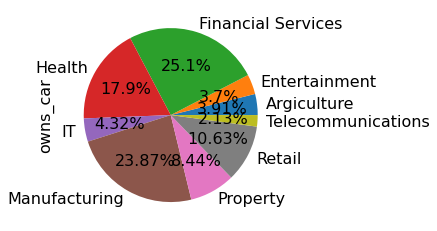

In [139]:
#addr_demo_txns.groupby('job_industry_category')['owns_car'].value_counts()
addr_demo_txns.groupby(['job_industry_category'])['owns_car'].sum()\
.plot.pie( y='gender',autopct=lambda pct: str(round(pct, 2)) + '%')
#plt.title("Old Car Ownership by Job Industry", bbox={'facecolor':'0.8', 'pad':5})

In [122]:
addr_demo_txns['gender']


1         Male
2         Male
3         Male
5         Male
6       Female
         ...  
3496    Female
3497    Female
3498      Male
3499    Female
3500    Female
Name: gender, Length: 2853, dtype: object

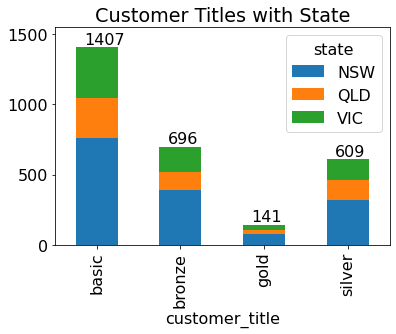

In [149]:
addr_demo_txns.groupby('customer_title')['state'] \
    .value_counts() \
    .unstack(level=1) \
    .plot.bar(stacked=True)
for i, v in enumerate(addr_demo_txns.groupby('customer_title') \
                      .agg({'state': lambda x: len(x)})['state']):
    plt.text(i - .15, v + 25, int(v), color='black')
axes = plt.gca()
axes.set_ylim([0, 1550])
plt.title('Customer Titles with State')
plt.show()

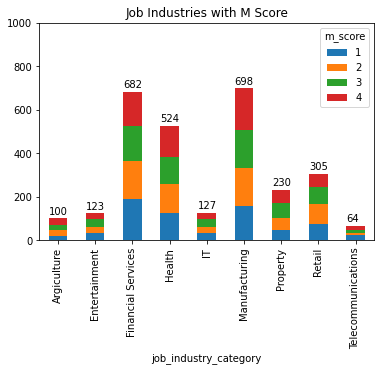

In [ ]:
addr_demo_txns.groupby('job_industry_category')['m_score'] \
    .value_counts() \
    .unstack(level=1) \
    .plot.bar(stacked=True)
for i, v in enumerate(addr_demo_txns.groupby('job_industry_category') \
                      .agg({'m_score': lambda x: len(x)})['m_score']):
    plt.text(i - .25, v + 20, int(v), color='black')
axes = plt.gca()
axes.set_ylim([0, 1000])
plt.title('Job Industries with M Score')
plt.show()

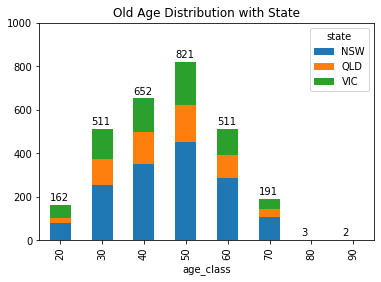

In [ ]:
addr_demo_txns.groupby('age_class')['state'] \
    .value_counts() \
    .unstack(level=1) \
    .plot.bar(stacked=True)
for i, v in enumerate(addr_demo_txns.groupby('age_class').agg({'age': lambda x: len(x)})['age']):
    plt.text(i - .25, v + 20, int(v), color='black')
axes = plt.gca()
axes.set_ylim([0, 1000])
plt.title('Old Age Distribution with State')
plt.show()

In [ ]:
gender_distribution = addr_demo_txns.groupby(['gender'])['past_3_years_bike_related_purchases'].sum().rename('count').to_frame()
gender_distribution

,count
gender,
Female,69741.0
Male,69597.0


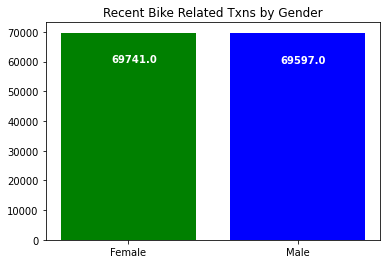

In [ ]:
labels = ['Female', 'Male']
plt.bar(labels, gender_distribution['count'], color=['green','blue'])
for i, v in enumerate(gender_distribution['count']):
    plt.text(i - .1, v - 10e3, v, color='white', fontweight='bold')
plt.title('Recent Bike Related Txns by Gender')
plt.show()

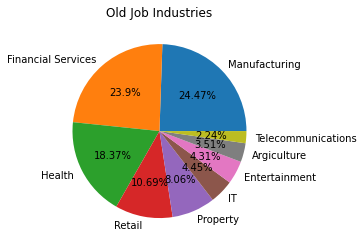

In [ ]:
addr_demo_txns.job_industry_category.value_counts().plot.pie(autopct=lambda pct: str(round(pct, 2)) + '%')
plt.title('Old Job Industries')
plt.ylabel('')
plt.show()

In [ ]:
c = addr_demo_txns.groupby(['state','customer_title']).agg({'age': lambda x: len(x)})
c.rename(columns={'age':'count'},inplace=True)
c['count'] = c['count'].astype(int)
c

count
state customer_title       
NSW   basic             758
      bronze            387
      gold               75
      silver            318
QLD   basic             291
      bronze            133
      gold               32
      silver            140
VIC   basic             358
      bronze            176
      gold               34
      silver            151

In [ ]:
c = addr_demo_txns.groupby(['total_score']).agg({'age': lambda x: x.count()}).cumsum()
c.rename(columns={'age':'count'},inplace=True)
c['count'] = c['count'].astype(int)
c

,count
total_score,
3,141
4,308
5,576
6,887
7,1305
8,1724
9,2113
10,2408
11,2596


Let’s look at gender:

In [ ]:
customer_demo_graphic_data['gender'] = customer_demo_graphic_data['gender'].replace('F','Female').replace('M','Male').replace('Femal','Female').replace('U','Unspecified')

In [ ]:
print("Count of class is:\n",customer_demo_graphic_data['gender'].value_counts())

Count of class is:
 Female     2039
Male       1873
Unknown      87
Name: gender, dtype: int64


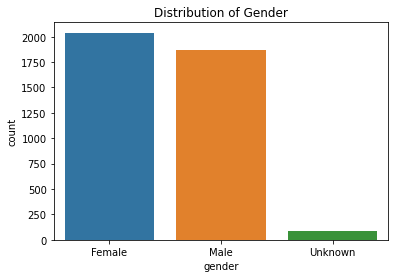

In [ ]:
sns.countplot(x='gender', data=customer_demo_graphic_data);
plt.title('Distribution of Gender');

There are slightly more women than men in this data set with some unspecified data. They will perhaps be a significant element in your customer segmentation efforts later.



Let's look on Age Distributions:

In [ ]:
customer_demo_graphic_data["DOB"]

0      1953-10-12
1      1980-12-16
2      1954-01-20
3      1961-10-03
4      1977-05-13
          ...    
3995   1975-08-09
3996   2001-07-13
3997          NaT
3998   1973-10-24
3999   1991-11-05
Name: DOB, Length: 3999, dtype: datetime64[ns]

#Bike purchases within the last 3 years by Gender for Existing Customer

In [ ]:
df_new = customer_demo_graphic_data[['gender', 'past_3_years_bike_related_purchases']]
df_new.head()

,gender,past_3_years_bike_related_purchases
0,Female,93.0
1,Male,81.0
2,Male,61.0
3,Male,33.0
4,Female,56.0


In [ ]:
NewCustomerList_data.isna().sum()

first_name                               0
last_name                               29
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     17
job_title                              106
job_industry_category                  165
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
tenure                                   0
address                                  0
postcode                                 0
state                                    0
country                                  0
property_valuation                       0
Unnamed: 16                              0
Unnamed: 17                              0
Unnamed: 18                              0
Unnamed: 19                              0
Unnamed: 20                              0
Rank                                     0
Value                                    0
dtype: int6

In [ ]:
NewCustomerList_data.duplicated().sum()

0

In [ ]:
NewCustomerList_data.shape

(1000, 23)

In [ ]:
new_cust_list_clean = NewCustomerList_data.dropna()
new_cust_list_clean

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,...,state,country,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,...,QLD,Australia,6.0,0.97,1.2125,1.515625,1.288281,1,1.0,1.718750
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,...,NSW,Australia,11.0,1.08,1.0800,1.350000,1.147500,1,1.0,1.718750
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,...,VIC,Australia,5.0,1.00,1.0000,1.000000,1.000000,1,1.0,1.718750
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,...,QLD,Australia,1.0,0.72,0.9000,0.900000,0.900000,4,4.0,1.703125
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,...,NSW,Australia,9.0,0.55,0.5500,0.687500,0.687500,4,4.0,1.703125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Ferdinand,Romanetti,Male,60,1959-10-07,Paralegal,Financial Services,Affluent Customer,N,No,...,NSW,Australia,7.0,0.76,0.7600,0.760000,0.760000,996,996.0,0.374000
996,Burk,Wortley,Male,22,2001-10-17,Senior Sales Associate,Health,Mass Customer,N,No,...,NSW,Australia,10.0,0.62,0.6200,0.775000,0.658750,997,997.0,0.357000
997,Melloney,Temby,Female,17,1954-10-05,Budget/Accounting Analyst IV,Financial Services,Affluent Customer,N,Yes,...,QLD,Australia,2.0,1.03,1.2875,1.287500,1.287500,997,997.0,0.357000
998,Dickie,Cubbini,Male,30,1952-12-17,Financial Advisor,Financial Services,Mass Customer,N,Yes,...,QLD,Australia,2.0,0.47,0.5875,0.587500,0.499375,997,997.0,0.357000


In [ ]:
new_cust_list_clean['age'] = (dt.datetime.now() - new_cust_list_clean['DOB']) / np.timedelta64(1, 'Y')
new_cust_list_clean['age_class'] = ((round(new_cust_list_clean['age'] / 10)) * 10).astype(int)
new_cust_list_clean.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,...,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value,age,age_class
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,...,6.0,0.97,1.2125,1.515625,1.288281,1,1.0,1.718750,65.653998,70
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,...,11.0,1.08,1.0800,1.350000,1.147500,1,1.0,1.718750,52.961062,50
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,...,5.0,1.00,1.0000,1.000000,1.000000,1,1.0,1.718750,48.525652,50
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,...,1.0,0.72,0.9000,0.900000,0.900000,4,4.0,1.703125,44.106670,40
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,...,9.0,0.55,0.5500,0.687500,0.687500,4,4.0,1.703125,57.459443,60


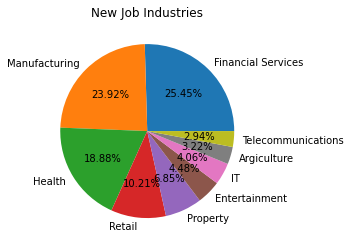

In [ ]:
new_cust_list_clean.job_industry_category.value_counts().plot.pie(autopct=lambda pct: str(round(pct, 2)) + '%')
plt.title('New Job Industries')
plt.ylabel('')
plt.show()

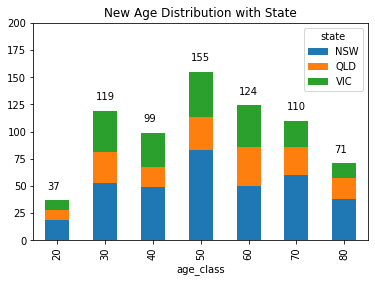

In [ ]:
new_cust_list_clean.groupby('age_class')['state'] \
    .value_counts() \
    .unstack(level=1) \
    .plot.bar(stacked=True)
for i, v in enumerate(new_cust_list_clean.groupby('age_class').agg({'age': lambda x: len(x)})['age']):
    plt.text(i - .2, v + 10, int(v), color='black')
axes = plt.gca()
axes.set_ylim([0, 200])
plt.title('New Age Distribution with State')
plt.show()

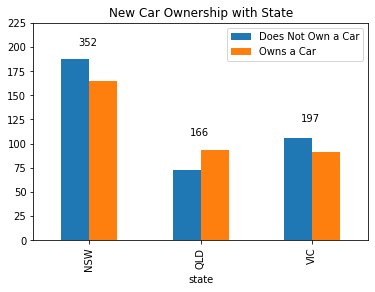

In [ ]:
new_cust_list_clean.groupby('state')['owns_car'] \
    .value_counts() \
    .unstack(level=1) \
    .plot.bar(stacked=False)
for i, v in enumerate(new_cust_list_clean.groupby('state').agg({'owns_car': lambda x: len(x)})['owns_car']):
    plt.text(i - .1, v // 2 + 25, int(v), color='black')
axes = plt.gca()
axes.set_ylim([0, 225])
plt.title('New Car Ownership with State')
plt.legend(['Does Not Own a Car', 'Owns a Car'])
plt.show()

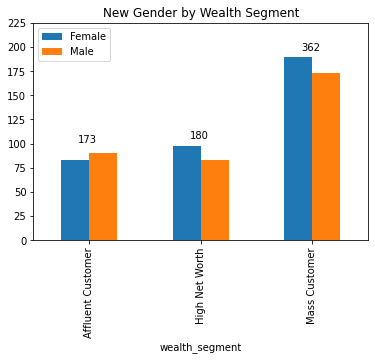

In [ ]:
new_cust_list_clean.groupby('wealth_segment')['gender'] \
    .value_counts() \
    .unstack(level=1) \
    .plot.bar(stacked=False)
for i, v in enumerate(new_cust_list_clean.groupby('wealth_segment') \
                      .agg({'gender': lambda x: len(x)})['gender']):
    plt.text(i - .1, v // 2 + 15, int(v), color='black')
axes = plt.gca()
axes.set_ylim([0, 225])
plt.title('New Gender by Wealth Segment')
plt.legend(['Female', 'Male'], loc='upper left')
plt.show()

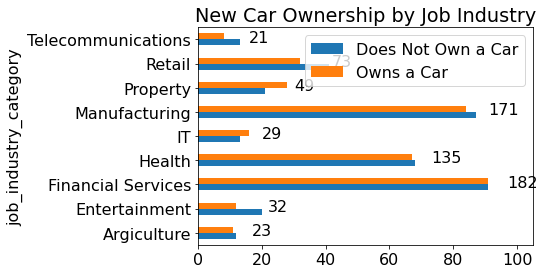

In [ ]:
new_cust_list_clean.groupby('job_industry_category')['owns_car'] \
    .value_counts() \
    .unstack(level=1) \
    .plot.barh(stacked=False)
for i, v in enumerate(new_cust_list_clean.groupby('job_industry_category') \
                      .agg({'owns_car': lambda x: len(x)})['owns_car']):
    plt.text(v // 2 + 6, i - .1, int(v), color='black')
axes = plt.gca()
axes.set_xlim([0,105])
plt.title('New Car Ownership by Job Industry')
plt.legend(['Does Not Own a Car', 'Owns a Car'], loc='upper right')
plt.show()

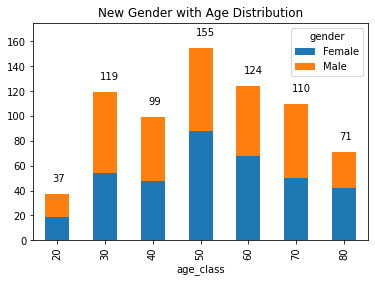

In [ ]:
new_cust_list_clean.groupby('age_class')['gender'] \
    .value_counts() \
    .unstack(level=1) \
    .plot.bar(stacked=True)
for i, v in enumerate(new_cust_list_clean.groupby('age_class') \
                      .agg({'gender': lambda x: len(x)})['gender']):
    plt.text(i - .1, v + 10, int(v), color='black')
axes = plt.gca()
axes.set_ylim([0, 175])
plt.title('New Gender with Age Distribution')
plt.show()

In [ ]:
addr_demo_txns['customer_segment'] = addr_demo_txns['total_score'].map({
    3: 'Platinum',
    4: 'Very Loyal',
    5: 'Becoming Loyal',
    6: 'Recent',
    7: 'Average',
    8: 'High Risk',
    9: 'Evasive',
    10: 'Losing',
    11: 'Inactive',
    12: 'Lost'
})
addr_demo_txns

,recency,frequency,monetary_value,r_score,f_score,m_score,rfm_class,total_score,customer_title,customer_id_x,...,tenure,age,age_class,customer_id_y,address,postcode,state,country,property_valuation,customer_segment
1,7.0,11,3018.09,1,1,3,113,5,silver,2.0,...,16.0,42.222988,40,2.0,6 Meadow Vale Court,2153.0,NSW,Australia,10.0,Becoming Loyal
2,128.0,3,2226.26,4,4,2,442,10,basic,3.0,...,15.0,69.128400,70,4.0,0 Holy Cross Court,4211.0,QLD,Australia,9.0,Losing
3,102.0,7,3290.21,4,3,3,433,10,basic,4.0,...,7.0,61.426667,60,5.0,17979 Del Mar Point,2448.0,NSW,Australia,4.0,Losing
5,16.0,6,2394.94,1,3,2,132,6,silver,6.0,...,13.0,56.473794,60,7.0,4 Delaware Trail,2210.0,NSW,Australia,9.0,Recent
6,64.0,5,3946.55,3,2,3,323,8,basic,7.0,...,11.0,47.036228,50,8.0,49 Londonderry Lane,2650.0,NSW,Australia,4.0,High Risk
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3496,256.0,4,2045.84,4,4,2,442,10,basic,3497.0,...,18.0,36.845738,40,3501.0,16 Carberry Pass,2119.0,NSW,Australia,11.0,Losing
3497,52.0,3,1648.32,3,4,4,344,11,basic,3498.0,...,5.0,27.345201,30,3502.0,12 Elgar Place,2155.0,NSW,Australia,10.0,Inactive
3498,127.0,6,3147.33,4,3,3,433,10,basic,3499.0,...,7.0,43.723361,40,3503.0,8749 Menomonie Point,2122.0,NSW,Australia,11.0,Losing
3499,51.0,7,4955.25,3,3,1,331,7,basic,3500.0,...,17.0,55.630518,60,3504.0,18072 American Parkway,3195.0,VIC,Australia,10.0,Average


In [ ]:
top_1000 = addr_demo_txns.sort_values('rfm_class').head(1000)
top_1000

,recency,frequency,monetary_value,r_score,f_score,m_score,rfm_class,total_score,customer_title,customer_id_x,...,tenure,age,age_class,customer_id_y,address,postcode,state,country,property_valuation,customer_segment
719,11.0,8,4227.84,1,1,1,111,3,gold,720.0,...,6.0,91.373894,90,724.0,09 Bartelt Lane,2190.0,NSW,Australia,8.0,Platinum
768,5.0,9,5580.57,1,1,1,111,3,gold,769.0,...,12.0,61.191207,60,773.0,88 Bay Drive,4305.0,QLD,Australia,3.0,Platinum
2434,0.0,9,6874.53,1,1,1,111,3,gold,2435.0,...,14.0,61.569038,60,2439.0,75 Westerfield Park,4570.0,QLD,Australia,1.0,Platinum
3420,5.0,11,6808.18,1,1,1,111,3,gold,3421.0,...,18.0,60.221988,60,3425.0,5 Anhalt Court,3122.0,VIC,Australia,7.0,Platinum
144,6.0,8,4888.02,1,1,1,111,3,gold,145.0,...,4.0,25.628533,30,149.0,939 Coleman Pass,4509.0,QLD,Australia,7.0,Platinum
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
873,31.0,5,3226.46,2,2,3,223,7,bronze,874.0,...,1.0,21.839270,20,878.0,1 Springview Place,4800.0,QLD,Australia,5.0,Average
3095,36.0,5,2799.49,2,2,3,223,7,bronze,3096.0,...,10.0,49.691998,50,3100.0,07 Loeprich Junction,2101.0,NSW,Australia,11.0,Average
3394,19.0,5,4073.20,2,2,3,223,7,bronze,3395.0,...,3.0,29.883241,30,3399.0,2 Monterey Terrace,2120.0,NSW,Australia,9.0,Average
1314,27.0,5,2894.17,2,2,3,223,7,bronze,1315.0,...,12.0,49.702950,50,1319.0,9 Dawn Court,4128.0,QLD,Australia,2.0,Average


In [ ]:
!pip install xlsxwriter

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 152.8/152.8 KB 7.0 MB/s eta 0:00:00


In [ ]:
from xlsxwriter import Workbook
writer_model_save = pd.ExcelWriter('/content/drive/MyDrive/Colab Notebooks/KPMG_data/kpmg_cleaned_data.xlsx',
                        engine = 'xlsxwriter')
addr_demo_txns.to_excel(writer_model_save, sheet_name = 'Dataset')
top_1000.to_excel(writer_model_save, sheet_name = 'top_100_model_data')
writer_model_save.save()
writer_model_save.close()